In [162]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import YearLocator
from matplotlib.ticker import MaxNLocator, MultipleLocator

from warnings import filterwarnings

In [164]:
filterwarnings("ignore")
sns.set_theme()

In [12]:
finance_df = pd.read_csv("Financial_stock_data.csv")
auto_df = pd.read_csv("../Automotive/final_auto_stock_data.csv")
tech_df = pd.read_csv("../tech/tech_data.csv")
finance_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,WD,Finance,Mortgage,47.700001,47.919998,47.259998,47.320000,181300
1,2018-01-03,WD,Finance,Mortgage,47.230000,47.230000,46.090000,46.130001,134800
2,2018-01-04,WD,Finance,Mortgage,46.189999,46.810001,46.090000,46.099998,140200
3,2018-01-05,WD,Finance,Mortgage,46.110001,48.060001,45.349998,47.980000,336900
4,2018-01-08,WD,Finance,Mortgage,48.160000,48.880001,47.369999,47.820000,310100
...,...,...,...,...,...,...,...,...,...
29012,2023-11-27,COF,Finance,Credit Services,105.699997,106.610001,105.430000,106.180000,1556800
29013,2023-11-28,COF,Finance,Credit Services,106.370003,109.050003,106.139999,108.580002,1874500
29014,2023-11-29,COF,Finance,Credit Services,109.180000,111.559998,109.180000,110.129997,2087500
29015,2023-11-30,COF,Finance,Credit Services,110.800003,111.970001,110.180000,111.660004,2439300


In [13]:
auto_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,CPRT,Automobiles,Auto & Truck Dealerships,43.52,43.6700,43.190,43.60,860740.0
1,2018-01-03,CPRT,Automobiles,Auto & Truck Dealerships,43.63,43.8500,43.200,43.39,1152481.0
2,2018-01-04,CPRT,Automobiles,Auto & Truck Dealerships,43.50,43.9500,43.300,43.74,1164240.0
3,2018-01-05,CPRT,Automobiles,Auto & Truck Dealerships,43.77,43.8800,43.030,43.53,922916.0
4,2018-01-08,CPRT,Automobiles,Auto & Truck Dealerships,43.59,43.8600,43.280,43.55,1254075.0
...,...,...,...,...,...,...,...,...,...
28602,2023-11-28,INTC,Automobiles,Semiconductors,43.69,44.3827,43.660,44.23,24548874.0
28603,2023-11-29,INTC,Automobiles,Semiconductors,44.60,45.3400,44.600,44.94,38982026.0
28604,2023-11-30,INTC,Automobiles,Semiconductors,44.65,45.0900,44.410,44.70,46262971.0
28605,2023-12-01,INTC,Automobiles,Semiconductors,44.36,44.3600,42.860,43.74,43928371.0


In [147]:
merge1_df = pd.merge(finance_df, auto_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df = pd.merge(merge1_df, tech_df, on = ["Date", "Ticker", "Sector", "Industry", "Open", "High", "Low", "Close","Volume"], how = "outer")
merged_df

,Date,Ticker,Sector,Industry,Open,High,Low,Close,Volume
0,2018-01-02,WD,Finance,Mortgage,47.700001,47.919998,47.259998,47.320000,181300.0
1,2018-01-03,WD,Finance,Mortgage,47.230000,47.230000,46.090000,46.130001,134800.0
2,2018-01-04,WD,Finance,Mortgage,46.189999,46.810001,46.090000,46.099998,140200.0
3,2018-01-05,WD,Finance,Mortgage,46.110001,48.060001,45.349998,47.980000,336900.0
4,2018-01-08,WD,Finance,Mortgage,48.160000,48.880001,47.369999,47.820000,310100.0
...,...,...,...,...,...,...,...,...,...
85339,2023-11-28,CTSH,Technology,Infotech,70.700000,71.520000,70.700000,71.300000,2607377.0
85340,2023-11-29,CTSH,Technology,Infotech,71.600000,71.800000,69.895000,70.120000,3521683.0
85341,2023-11-30,CTSH,Technology,Infotech,70.390000,70.520000,69.800000,70.380000,8254394.0
85342,2023-12-01,CTSH,Technology,Infotech,70.230000,70.870000,70.080000,70.820000,2672566.0


# **Overall Performance**

In [148]:
ls1 = []
ls2 = []
ls3 = []
ticker = []
sector = []
industry = []
analysis_df = {}
for symbols in merged_df["Ticker"].unique():
    # Find the dictionary with the earliest date
    con_df = merged_df.loc[merged_df["Ticker"] == symbols]

    # Convert the "date" column to datetime
    con_df["Date"] = pd.to_datetime(con_df["Date"])

    # Find the row with the earliest date
    earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]
    latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]
    percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

    ticker.append(symbols)
    sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
    industry.append(con_df.loc[con_df["Date"].idxmax(), "Industry"])
    ls1.append(earliest_date_row)
    ls2.append(latest_date_row)
    ls3.append(percent_change_price)


analysis_df = pd.DataFrame({
    "Ticker" : ticker,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : ls1,
    "Final close" : ls2,
    "Total Change in Percent" : ls3

})
analysis_df

,Ticker,Sector,Industry,Initial Open,Final close,Total Change in Percent
0,WD,Finance,Mortgage,47.700001,89.870003,88.406711
1,PFSI,Finance,Mortgage,22.350000,79.779999,256.957483
2,LDI,Finance,Mortgage,14.000000,1.980000,-85.857143
3,GHI,Finance,Mortgage,18.150000,17.040001,-6.115695
4,COOP,Finance,Mortgage,10.320000,62.709999,507.655048
5,AFL,Finance,Insurance,44.180000,82.610001,86.985061
6,HIG,Finance,Insurance,56.340000,77.820000,38.125665
7,PRU,Finance,Insurance,115.169998,97.739998,-15.134150
8,ALL,Finance,Insurance,104.070000,137.679993,32.295564
9,PGR,Finance,Insurance,56.459999,162.460007,187.743552


# **Best Performers by Sector**

In [149]:
#idxmax returns the index of the max value
best_performer_df = analysis_df.iloc[analysis_df.groupby("Sector")["Total Change in Percent"].idxmax()].reset_index(drop = True)
best_performer_df

,Ticker,Sector,Industry,Initial Open,Final close,Total Change in Percent
0,AMD,Automobiles,Semiconductors,10.42,118.570000,1037.907869
1,COOP,Finance,Mortgage,10.32,62.709999,507.655048
2,NOW,Technology,Software,131.00,687.620000,424.900763


In [152]:
top_performers_by_sector = best_performer_df["Ticker"]
ls= []
for ticker in top_performers_by_sector:
    line_df = merged_df.loc[(merged_df["Ticker"] == ticker),["Ticker","Date", "Close"]]
    line_df["Year"] = pd.to_datetime(line_df["Date"]).dt.year
    
    ls.append(line_df)
plot_df = pd.concat(ls, ignore_index = True)
plot_df

,Ticker,Date,Close,Year
0,AMD,2018-01-02,10.98,2018
1,AMD,2018-01-03,11.55,2018
2,AMD,2018-01-04,12.12,2018
3,AMD,2018-01-05,11.88,2018
4,AMD,2018-01-08,12.28,2018
...,...,...,...,...
5958,NOW,2023-11-28,665.24,2023
5959,NOW,2023-11-29,678.93,2023
5960,NOW,2023-11-30,685.74,2023
5961,NOW,2023-12-01,690.79,2023


In [ ]:
ax=sns.lineplot(data=plot_df, x = "Date", y = "Close", hue = "Ticker")

ax.xaxis.set_major_locator(YearLocator())
# ax.xaxis.set_major_locator(MaxNLocator(base = 2))
# ax.xaxis.set_minor_locator(MultipleLocator(1))

plt.show()

# **Performance by Year**

In [18]:
merged_df["Year"] = merged_df["Date"].str.split("-").str[0].str[:4]
ls1 = []
ls2 = []
ls3 = []
ticker = []
sector = []
industry = []
year_ls = []
for year in merged_df["Year"].unique():

    yearly_df = merged_df.loc[merged_df["Year"] == year]

    for symbols in yearly_df["Ticker"].unique():
        # Find the ticker with the earliest date
        con_df = yearly_df.loc[yearly_df["Ticker"] == symbols]

        # Convert the "date" column to datetime
        con_df["Date"] = pd.to_datetime(con_df["Date"])

        # Find the row with the earliest date
        earliest_date_row = con_df.loc[con_df["Date"].idxmin(), "Open"]
        latest_date_row = con_df.loc[con_df["Date"].idxmax(), "Close"]
        percent_change_price = ((latest_date_row - earliest_date_row)*100)/earliest_date_row

        ticker.append(symbols)
        sector.append(con_df.loc[con_df["Date"].idxmin(), "Sector"])
        industry.append(con_df.loc[con_df["Date"].idxmax(), "Industry"])
        ls1.append(earliest_date_row)
        ls2.append(latest_date_row)
        ls3.append(percent_change_price)
        year_ls.append(year)
top_by_year = pd.DataFrame({
    "Ticker" : ticker,
    "Year" : year_ls,
    "Sector" : sector,
    "Industry" : industry,
    "Initial Open" : ls1,
    "Final Close" : ls2,
    "Total Change in Percent" : ls3

})
top_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
0,WD,2018,Finance,Mortgage,47.700001,43.250000,-9.329142
1,PFSI,2018,Finance,Mortgage,22.350000,21.260000,-4.876958
2,GHI,2018,Finance,Mortgage,18.150000,16.860001,-7.107433
3,COOP,2018,Finance,Mortgage,10.320000,11.670000,13.081399
4,AFL,2018,Finance,Insurance,44.180000,45.560001,3.123588
...,...,...,...,...,...,...,...
310,ACN,2023,Technology,Infotech,269.200000,336.430000,24.973997
311,IBM,2023,Technology,Infotech,141.100000,161.100000,14.174344
312,FI,2023,Technology,Infotech,101.720000,130.350000,28.145891
313,INFY,2023,Technology,Infotech,18.180000,17.690000,-2.695270


In [23]:
perf_by_year = pd.DataFrame(top_by_year.groupby(["Year", "Sector"])["Total Change in Percent"].mean())
perf_by_year

Total Change in Percent
Year Sector                              
2018 Automobiles               -13.393407
     Finance                   -11.083345
     Technology                 -5.574842
2019 Automobiles                47.608147
     Finance                    33.834788
     Technology                 36.438111
2020 Automobiles                35.298993
     Finance                    18.944464
     Technology                 25.401687
2021 Automobiles                33.697632
     Finance                    24.180602
     Technology                 26.707273
2022 Automobiles               -33.253297
     Finance                   -13.455324
     Technology                -32.222795
2023 Automobiles                34.696392
     Finance                    11.664808
     Technology                 28.314930

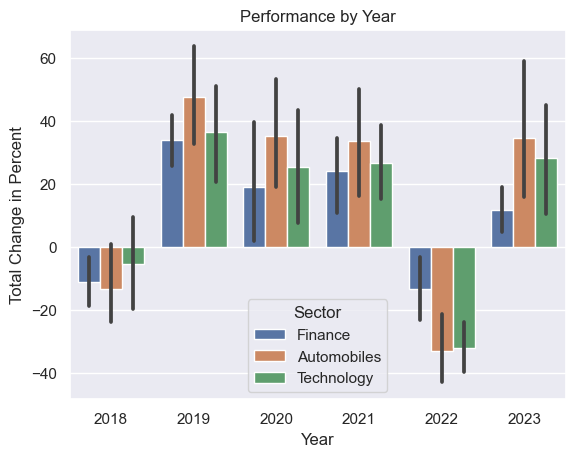

In [20]:
sns.barplot(top_by_year, x="Year", y="Total Change in Percent", hue="Sector").set(title='Performance by Year')
plt.show()

# **Top Performers by Year**

In [ ]:
grouped_df1 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmax()
best_by_year = top_by_year.iloc[grouped_df1, :]
best_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
36,AMD,2018,Automobiles,Semiconductors,10.42,18.460000,77.159309
87,AMD,2019,Automobiles,Semiconductors,18.01,45.860000,154.636313
105,COOP,2020,Finance,Mortgage,12.54,31.030001,147.448172
187,F,2021,Automobiles,Auto Manufacturers,8.81,20.770000,135.754824
232,MBLY,2022,Automobiles,Auto Parts,26.71,35.060000,31.261700
296,NVDA,2023,Automobiles,Semiconductors,148.51,455.100000,206.444011


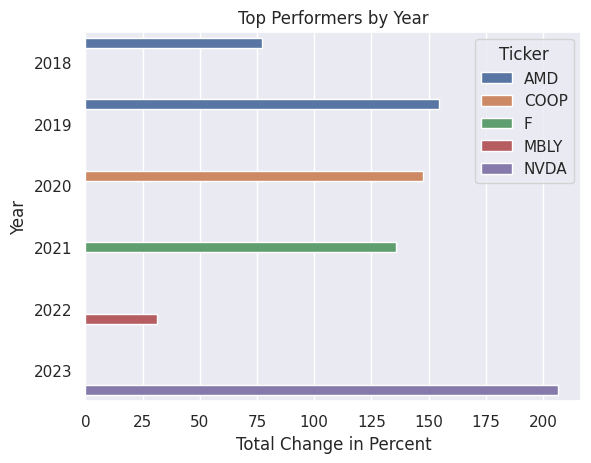

In [ ]:
sns.barplot(best_by_year, x = "Total Change in Percent", y="Year", orient="h", hue = "Ticker").set(title='Top Performers by Year')
plt.show()

# **Bottom Performers by Year**

In [ ]:
grouped_df2 = top_by_year.groupby(["Year"])["Total Change in Percent"].idxmin()
worst_by_year = top_by_year.iloc[grouped_df2, :]
worst_by_year

,Ticker,Year,Sector,Industry,Initial Open,Final Close,Total Change in Percent
27,ALV,2018,Automobiles,Auto Parts,127.51,70.23,-44.921967
96,LPL,2019,Technology,Consumer,8.00,6.94,-13.250000
145,AAPL,2020,Technology,Consumer,296.24,132.69,-55.208615
156,LDI,2021,Finance,Mortgage,14.00,4.80,-65.714284
237,TSLA,2022,Automobiles,Auto Manufacturers,1147.75,123.18,-89.267698
305,ZI,2023,Technology,Software,30.67,14.71,-52.037822


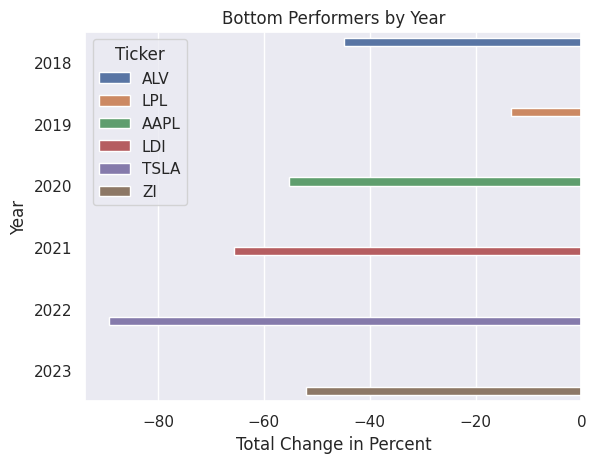

In [ ]:
sns.barplot(worst_by_year, x = "Total Change in Percent", y="Year", orient="h", hue = "Ticker").set(title='Bottom Performers by Year')
plt.show()

# Performance by Sector

In [31]:
perf_by_sector = pd.DataFrame(top_by_year.groupby(["Sector", "Industry"])["Total Change in Percent"].mean())
perf_by_sector

Total Change in Percent
Sector      Industry                                         
Automobiles Auto & Truck Dealerships                19.032649
            Auto Manufacturers                       9.054450
            Auto Parts                               5.547878
            Semiconductors                          33.434000
Finance     Asset Management                         5.121655
            Credit Services                         11.782492
            Insurance                                9.364947
            Mortgage                                16.738930
Technology  Consumer                                11.999469
            Infotech                                 7.324265
            Software                                20.297237

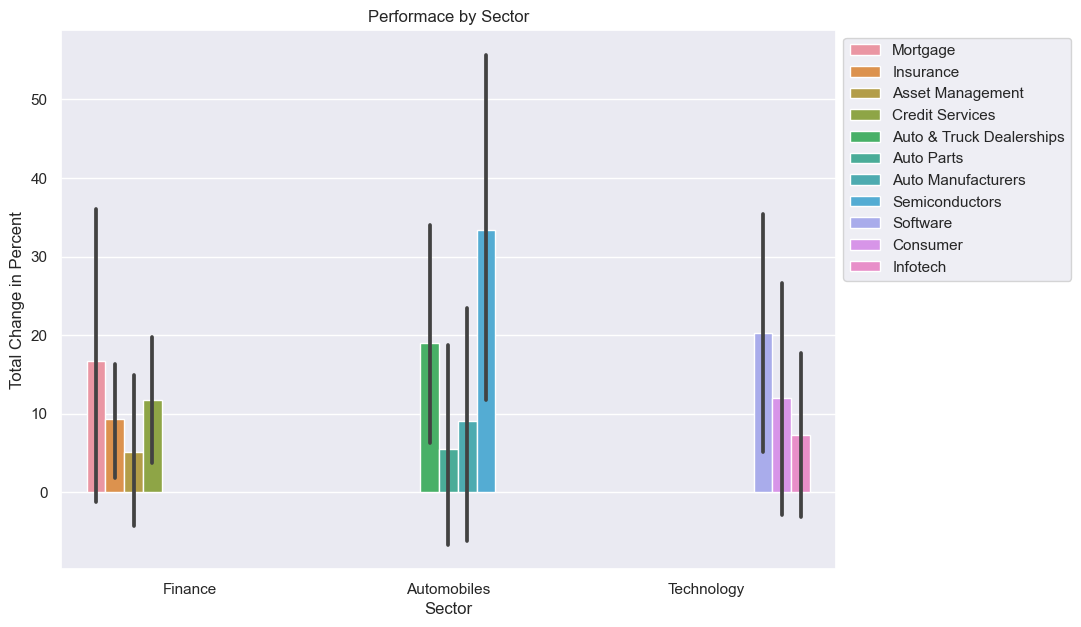

In [29]:
plt.figure(figsize=(10, 7))
ax = sns.barplot(top_by_year, x="Sector", y="Total Change in Percent", hue ="Industry")
ax.legend(loc = "best", bbox_to_anchor=(1, 1))
ax.set_title("Performace by Sector")
plt.show()